In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.0.0-rc1


In [2]:
fashion_mnist=keras.datasets.fashion_mnist
(x_train_all,y_train_all),(x_test,y_test)=fashion_mnist.load_data()
x_valid,x_train=x_train_all[:5000],x_train_all[5000:]
y_valid,y_train=y_train_all[:5000],y_train_all[5000:]

print(x_valid.shape,y_valid.shape)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28,1)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28,1)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28,1)



In [4]:
model = keras.Sequential()
#添加两个卷积层一个pooling层
model.add(keras.layers.Conv2D(filters=32,kernel_size =3,padding = 'same',activation= 'selu',input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(filters=32,kernel_size =3,padding = 'same',activation= 'selu'))
model.add(keras.layers.MaxPool2D(pool_size = 2))

#添加两个卷积层一个pooling层
model.add(keras.layers.Conv2D(filters=64,kernel_size =3,padding = 'same',activation= 'selu'))
model.add(keras.layers.Conv2D(filters=64,kernel_size =3,padding = 'same',activation= 'selu'))
model.add(keras.layers.MaxPool2D(pool_size = 2))

#添加两个卷积层一个pooling层
model.add(keras.layers.Conv2D(filters=128,kernel_size =3,padding = 'same',activation= 'selu'))
model.add(keras.layers.Conv2D(filters=128,kernel_size =3,padding = 'same',activation= 'selu'))
model.add(keras.layers.MaxPool2D(pool_size = 2))

#添加全连接层
#先flatten
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='selu'))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(loss="sparse_categorical_crossentropy",  # 损失函数
              optimizer = "sgd",  # 优化器名
              metrics = ["accuracy"])

model.summary()

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
____________________________

In [5]:
logdir = "cnn-selu-callbacks"
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir ,"fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir)  ,  # 保存在logdir中
    keras.callbacks.ModelCheckpoint(output_model_file,  # 模型名称
                                    save_best_only = True),  # 保存一个最好的模型
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)  ,  # 如果连续5次迭代，loss值达到最小误差1e-3，便停止训练
]


In [6]:
history = model.fit(x_train_scaled, y_train, epochs=10,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks = callbacks)

Train on 55000 samples, validate on 5000 samples
Epoch 1/10
55000/55000 [==============================] - 103s 2ms/sample - loss: 0.4243 - accuracy: 0.8463 - val_loss: 0.3343 - val_accuracy: 0.8778
Epoch 2/10
55000/55000 [==============================] - 102s 2ms/sample - loss: 0.2838 - accuracy: 0.8976 - val_loss: 0.2771 - val_accuracy: 0.9014
Epoch 3/10
55000/55000 [==============================] - 102s 2ms/sample - loss: 0.2354 - accuracy: 0.9146 - val_loss: 0.2460 - val_accuracy: 0.9100
Epoch 4/10
55000/55000 [==============================] - 105s 2ms/sample - loss: 0.2011 - accuracy: 0.9283 - val_loss: 0.2300 - val_accuracy: 0.9190
Epoch 5/10
55000/55000 [==============================] - 103s 2ms/sample - loss: 0.1749 - accuracy: 0.9365 - val_loss: 0.2365 - val_accuracy: 0.9152
Epoch 6/10
55000/55000 [==============================] - 106s 2ms/sample - loss: 0.1479 - accuracy: 0.9469 - val_loss: 0.2348 - val_accuracy: 0.9156
Epoch 7/10
55000/55000 [===========================

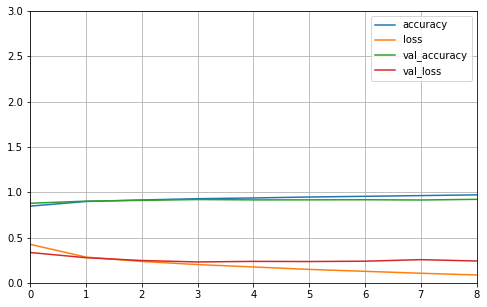

In [7]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8 ,5))
    plt.grid(True)
    plt.gca().set_ylim(0 ,3)
    plt.show()


plot_learning_curves(history)

In [8]:
model.evaluate(x_test_scaled ,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.2633041099786758, 0.9154]